In [3]:
from furlib import *
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib nbagg

In [4]:
Fanuc = Robot((75,-pi/2,330,t1), (300,pi,0,t2), (75,-pi/2,0,t3), (0,pi/2,-320,t4), (0,-pi/2,0,t5), (0,pi,-80,t6))
T = Fanuc.T

## Inverse Kinematics

In [5]:
#vals = {t1:0,t2:pi/2,t3:0,t4:pi/3,t5:pi/3,t6:0}
#H = T.subs(vals).evalf()

In [6]:
deg = lambda x: (x*180/pi).evalf()
rad = lambda x: (x*pi/180).evalf()

phi,theta,psi = 0,pi,0
H = ea2htm(phi,theta,psi)
a1,d1,a2,a3,d4,d6 = 75,330,300,75,320,80
x,y,z = 300,200,200

xm,ym,zm = x - d6*H[0,2], y - d6*H[1,2], z - d6*H[2,2]
T1 = atan2(ym,xm).evalf(chop=True)
b = sqrt(xm**2 + ym**2)
a = zm - d1
c = sqrt(a**2 + (b-a1)**2)
d = sqrt(a3**2 + d4**2)
beta = atan2(a, b-a1)
K1 = (a2**2+c**2-d**2)/(2*a2*c)
alpha = atan2(sqrt(1-K1**2), K1)
K2 = (a2**2+d**2-c**2)/(2*a2*d)
gamma = atan2(sqrt(1-K2**2), K2)
delta = atan2(d4,a3)

T2 = -(alpha + beta).evalf(chop=True)
T3 = (gamma + delta - pi).evalf(chop=True)

# Orientación

R3_0 = ( dhs(75,-pi/2,330,T1)*dhs(300,pi,0,T2)*dhs(75,-pi/2,0,T3) )[:3,:3]
R6_0 = H[:3,:3]
R6_3 = R3_0.inv()*R6_0
T4 = atan2(R6_3[1,2], R6_3[0,2]).evalf(chop=True)
K5 = -R6_3[2,2]
T5 = atan2(sqrt(1-K5**2),K5).evalf(chop=True)
T6 = atan2(R6_3[2,1], R6_3[2,0]).evalf(chop=True)

for ang in (T1,T2,T3,T4,T5,T6):
    print(deg(ang))

33.6900675259798
-57.7632635578044
-48.5005956216640
180.000000000000
9.26266793614049
146.309932474020


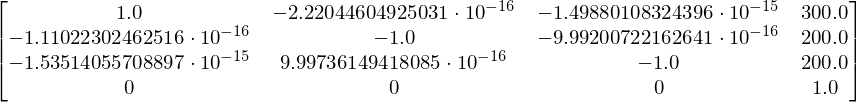

In [7]:
vals = {t1:T1,t2:T2,t3:T3,t4:T4,t5:T5,t6:T6}
T.subs(vals).evalf(chop=True)

In [8]:
#simplify(Fanuc.Ts[3]*Fanuc.Ts[4]*Fanuc.Ts[5])

In [9]:
#Fanuc.plot_diagram(vals)

## IK, other solution

In [12]:
T1 = atan2(ym,xm).evalf(chop=True)
b = sqrt(xm**2 + ym**2)
a = zm - d1
c = sqrt(a**2 + (b-a1)**2)
d = sqrt(a3**2 + d4**2)
beta = atan2(a, b-a1)
K1 = (a2**2+c**2-d**2)/(2*a2*c)
alpha = atan2(-sqrt(1-K1**2), K1)
K2 = (a2**2+d**2-c**2)/(2*a2*d)
gamma = atan2(-sqrt(1-K2**2), K2)
delta = atan2(d4,a3)

T2 = -(alpha + beta).evalf(chop=True)
T3 = (gamma + delta - pi).evalf(chop=True)

# Orientación

R3_0 = ( dhs(75,-pi/2,330,T1)*dhs(300,pi,0,T2)*dhs(75,-pi/2,0,T3) )[:3,:3]
R6_0 = H[:3,:3]
R6_3 = R3_0.inv()*R6_0
T4 = atan2(R6_3[1,2], R6_3[0,2]).evalf(chop=True)
K5 = -R6_3[2,2]
T5 = atan2(sqrt(1-K5**2),K5).evalf(chop=True)
T6 = atan2(R6_3[2,1], R6_3[2,0]).evalf(chop=True)

for ang in (T1,T2,T3,T4,T5,T6):
    print(deg(ang))

33.6900675259798
77.6265993768722
-157.880625802750
-180.000000000000
124.492774820378
146.309932474020


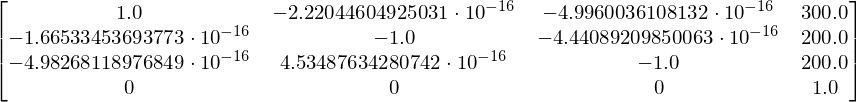

In [13]:
vals = {t1:T1,t2:T2,t3:T3,t4:T4,t5:T5,t6:T6}
T.subs(vals).evalf(chop=True)

## Jacobiano

In [90]:
J = Fanuc.J

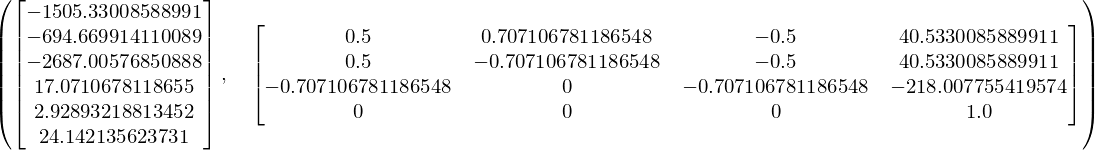

In [91]:
vals={t1:pi/4, t2:pi/4, t3:0, t4:0, t5:0, t6:0}
JN = J.subs(vals)
TN = T.subs(vals)
qv = Matrix([10,10,10,10,10,10])
(JN*qv).evalf(), TN.evalf()

In [37]:
sqrt(264.57**2)*10

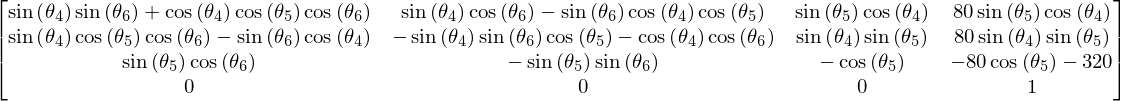

In [5]:
simplify(Fanuc.Ts[3]*Fanuc.Ts[4]*Fanuc.Ts[5])

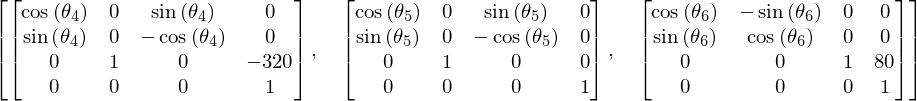

In [6]:
Fanuc.Ts[3:]

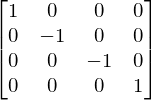

In [8]:
MR